In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("penguins.csv")
df=df.dropna()
df=df[df["sex"]!="."]
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Train Test Split

In [40]:
X=pd.get_dummies(df.drop("species",axis=1),drop_first=True)

In [41]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [42]:
y=df["species"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=9)

## Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model=RandomForestClassifier(n_estimators=20,max_features="sqrt",random_state=9) #içindeki ağaç sayısı ->n_estimator

In [59]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=9)

In [60]:
pengu_pred=model.predict(X_test)

## Değerlendirme Metrikleri

In [61]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

In [62]:
confusion_matrix(y_test,pengu_pred)

array([[44,  1,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]])

In [63]:
print(classification_report(y_test,pengu_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.96      0.98        46
   Chinstrap       0.96      1.00      0.98        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.98       100
   macro avg       0.98      0.99      0.98       100
weighted avg       0.98      0.98      0.98       100



In [64]:
## sonuç decision tree'ye göre daha kötü oldu.

In [65]:
model.feature_importances_

array([0.37228264, 0.13727144, 0.20171606, 0.13298837, 0.12284178,
       0.02813977, 0.00475993])

In [66]:
hata=[]

for n in range(1,99):
    model=RandomForestClassifier(n_estimators=n,max_features="sqrt", random_state=9)
    model.fit(X_train,y_train)
    deneme_pred=model.predict(X_test)
    hata.append(1-accuracy_score(deneme_pred,y_test))


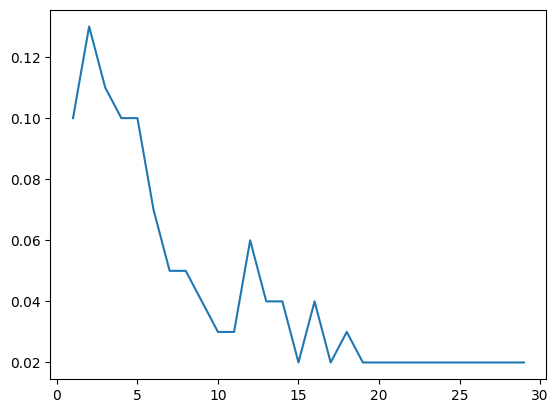

In [67]:
plt.plot(range(1, 30), hata[:29], label="Hata Oranı")

In [68]:
# model 20'den sonra daha iyi çalışır.